<a href="https://colab.research.google.com/github/LeonardoClemente23/quarentenadados-Alura/blob/main/Aula_03_desafios_QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
imdb = pd.read_csv("movie_metadata.csv")
imdb = imdb.drop_duplicates()
imdb.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa_prof = imdb_usa.copy()
imdb_usa_prof['profits'] = imdb_usa_prof['gross'] - imdb_usa_prof['budget']
imdb_usa_prof.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profits
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

Text(0, 0.5, 'IMDb Score')

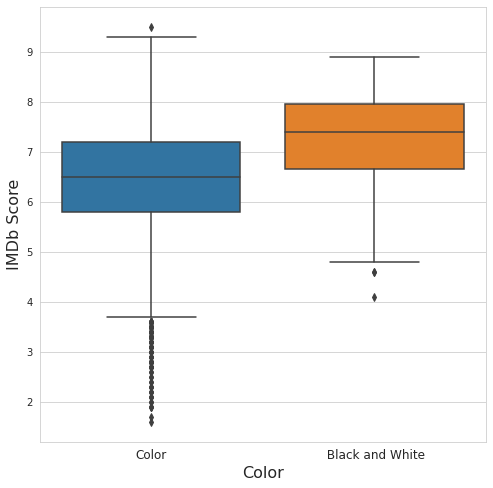

In [ ]:
imdb_c_or_bw = imdb.query("color in ['Color', ' Black and White']")
plt.figure(figsize=(8,8))
plot_cx = sns.boxplot(data=imdb_c_or_bw, x="color", y="imdb_score")

plot_cx.set_xticklabels(['Color', ' Black and White'], fontsize=12)
plot_cx.set_xlabel("Color", fontsize=16)
plot_cx.set_ylabel("IMDb Score", fontsize=16)

Como visto na aula 03, os filmes em preto e branco apresenta notas maiores do que os coloridos. Mas os filmes coloridos tem mais médias porque são maioria nesse dataset. Acredito que pelo fato da maioria dos filmes em preto e branco serem mais antigos, o público desses filmes é seleto. Sendo assim esses dados estão contaminados com os viéses dos usuários que deram nota para eles.

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [ ]:
imdb_usa_prof.sort_values('profits')
filme_preju = imdb_usa_prof.loc[5,'movie_title'].replace('\xa0','')
preju = int(imdb_usa_prof.loc[5,'profits']) * (-1)

print(f"O filme americano com o maior prejuízo nesse dataset: {filme_preju}")
print(f"Prejuízo: R${preju},00")

O filme americano com o maior prejuízo nesse dataset: John Carter
Prejuízo: R$190641321,00


##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

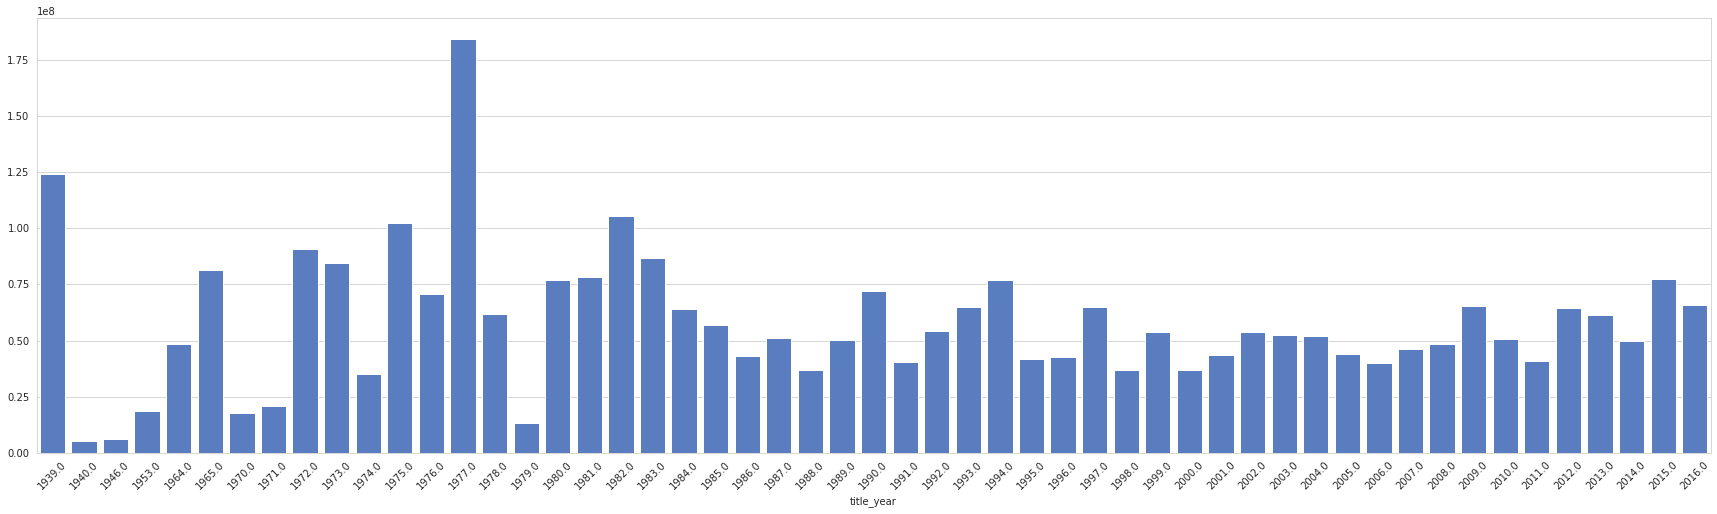

In [ ]:
plt.figure(figsize=(30,8))
imdb_prof_per_year = imdb_usa_prof.groupby("title_year")['profits'].std().dropna()

sns.barplot(x=imdb_prof_per_year.index,
            y=imdb_prof_per_year.values,
            palette=sns.color_palette("muted", n_colors=1))
plt.xticks(rotation=45)
plt.show()

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [ ]:
imdb_pre_war = imdb_usa_prof.query("title_year < 1945").dropna()
imdb_pre_war.sort_values("profits", ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profits
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,194678278.0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0
1143,Color,Norman Ferguson,105.0,88.0,3.0,40.0,Dickie Jones,1000.0,84300000.0,Animation|Family|Fantasy|Musical,Mel Blanc,Pinocchio,90360,1178,Cliff Edwards,0.0,boy|conscience|fairy|jiminy cricket|pinocchio,http://www.imdb.com/title/tt0032910/?ref_=fn_t...,147.0,English,USA,Approved,2600000.0,1940.0,48.0,7.5,1.37,0,81700000.0
4157,Black and White,Victor Fleming,213.0,102.0,149.0,357.0,Terry,695.0,22202612.0,Adventure|Family|Fantasy|Musical,Margaret Hamilton,The Wizard of Oz,291875,2509,Billie Burke,3.0,evil witch|tornado|witch|wizard|wizard of oz,http://www.imdb.com/title/tt0032138/?ref_=fn_t...,533.0,English,USA,Passed,2800000.0,1939.0,421.0,8.1,1.37,14000,19402612.0
4812,Black and White,Harry Beaumont,36.0,100.0,4.0,4.0,Bessie Love,77.0,2808000.0,Musical|Romance,Anita Page,The Broadway Melody,4546,109,Charles King,8.0,sibling rivalry|singer|sister act|whistling|wi...,http://www.imdb.com/title/tt0019729/?ref_=fn_t...,71.0,English,USA,Passed,379000.0,1929.0,28.0,6.3,1.37,167,2429000.0
4706,Black and White,Mark Sandrich,66.0,81.0,10.0,23.0,Edward Everett Horton,610.0,3000000.0,Comedy|Musical|Romance,Ginger Rogers,Top Hat,13269,824,Eric Blore,2.0,dance|dancer|dancing|horse|tap dancing,http://www.imdb.com/title/tt0027125/?ref_=fn_t...,98.0,English,USA,Approved,609000.0,1935.0,172.0,7.8,1.37,1000,2391000.0
4786,Black and White,Lloyd Bacon,65.0,89.0,24.0,45.0,Dick Powell,610.0,2300000.0,Comedy|Musical|Romance,Ginger Rogers,42nd Street,7921,995,George Brent,2.0,chorus girl|chorus line|director|gala premiere...,http://www.imdb.com/title/tt0024034/?ref_=fn_t...,97.0,English,USA,Unrated,439000.0,1933.0,105.0,7.7,1.37,439,1861000.0
4427,Black and White,Charles Chaplin,120.0,87.0,0.0,8.0,Stanley Blystone,309.0,163245.0,Comedy|Drama|Family,Paulette Goddard,Modern Times,143086,352,Fred Malatesta,1.0,actor director writer|invention|machine|music ...,http://www.imdb.com/title/tt0027977/?ref_=fn_t...,211.0,English,USA,G,1500000.0,1936.0,8.0,8.6,1.37,0,-1336755.0


O filme com maior budget antes da 2ª guerra foi o filme "E o vento levou"(Gone with the wind) que inclusive é o filme mais bem sucedidos de todos os tempos, levando em consideração a inflação. 

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [ ]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.query("filmes_irmaos == 18")


,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

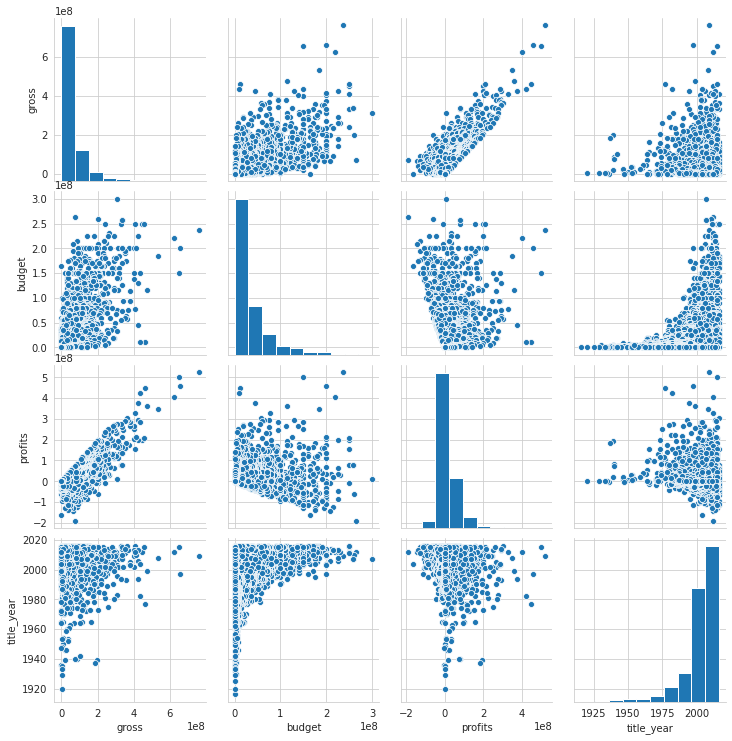

In [ ]:
sns.pairplot(data = imdb_usa_prof[["gross", "budget", "profits", "title_year"]])

In [ ]:
imdb_usa_prof[["gross", "budget", "profits", "title_year"]].corr()

,gross,budget,profits,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
profits,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

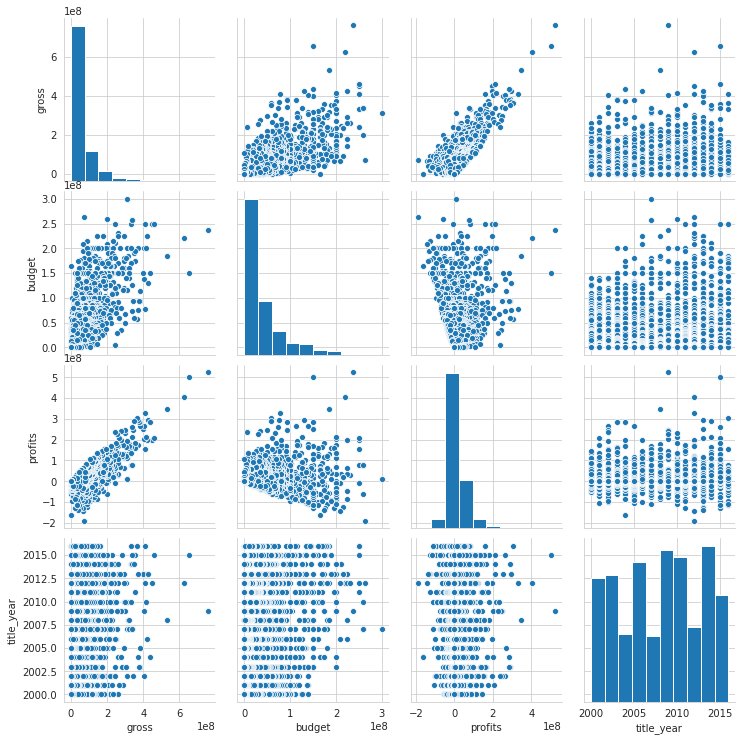

In [ ]:
imdb_usa_prof_2000 = imdb_usa_prof.query("title_year >= 2000")
sns.pairplot(data = imdb_usa_prof_2000[["gross", "budget", "profits", "title_year"]])

In [ ]:
imdb_usa_prof_2000[["gross", "budget", "profits", "title_year"]].corr()

,gross,budget,profits,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
profits,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

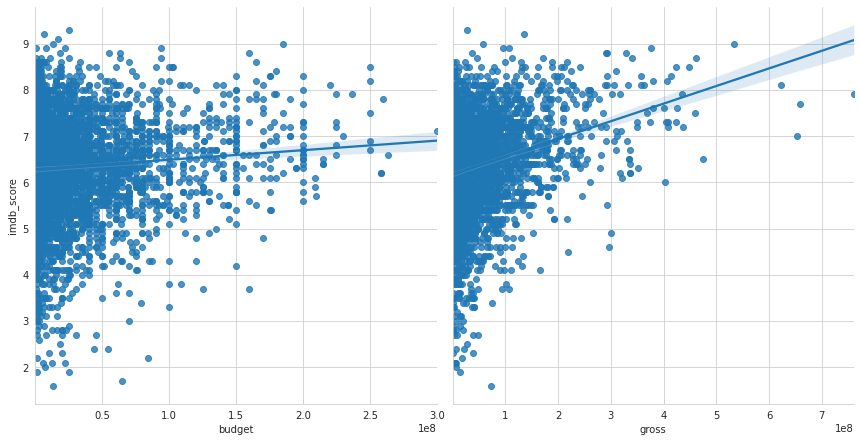

In [ ]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [ ]:
imdb_usa_prof.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profits'],
      dtype='object')

In [ ]:
imdb_usa_prof_corr = imdb_usa_prof[["gross", "budget", "profits", "title_year",
               "num_critic_for_reviews","duration","director_facebook_likes",
               "actor_1_facebook_likes","num_user_for_reviews","imdb_score",
               "movie_facebook_likes","cast_total_facebook_likes","num_voted_users"]].corr()
imdb_usa_prof_corr

,gross,budget,profits,title_year,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,num_user_for_reviews,imdb_score,movie_facebook_likes,cast_total_facebook_likes,num_voted_users
gross,1.000000,0.645673,0.797037,0.034827,0.492105,0.286503,0.142575,0.135720,0.557664,0.258948,0.378532,0.220932,0.640387
budget,0.645673,1.000000,0.053455,0.229453,0.524412,0.315569,0.098204,0.159390,0.436341,0.078936,0.346950,0.239648,0.430993
profits,0.797037,0.053455,1.000000,-0.123035,0.247287,0.128253,0.108315,0.048657,0.394839,0.294858,0.228476,0.097707,0.508717
title_year,0.034827,0.229453,-0.123035,1.000000,0.304569,-0.124484,-0.068241,0.094706,0.020008,-0.227569,0.224832,0.123207,0.025617
num_critic_for_reviews,0.492105,0.524412,0.247287,0.304569,1.000000,0.309759,0.188520,0.181053,0.611119,0.320960,0.685480,0.260116,0.621889
duration,0.286503,0.315569,0.128253,-0.124484,0.309759,1.000000,0.205327,0.098420,0.364391,0.275720,0.235946,0.140485,0.359692
director_facebook_likes,0.142575,0.098204,0.108315,-0.068241,0.188520,0.205327,1.000000,0.085513,0.241327,0.201567,0.170763,0.115449,0.313564
actor_1_facebook_likes,0.135720,0.159390,0.048657,0.094706,0.181053,0.098420,0.085513,1.000000,0.133737,0.095778,0.122531,0.953753,0.177225
num_user_for_reviews,0.557664,0.436341,0.394839,0.020008,0.611119,0.364391,0.241327,0.133737,1.000000,0.320336,0.414500,0.197018,0.797354
imdb_score,0.258948,0.078936,0.294858,-0.227569,0.320960,0.275720,0.201567,0.095778,0.320336,1.000000,0.262614,0.111231,0.447340


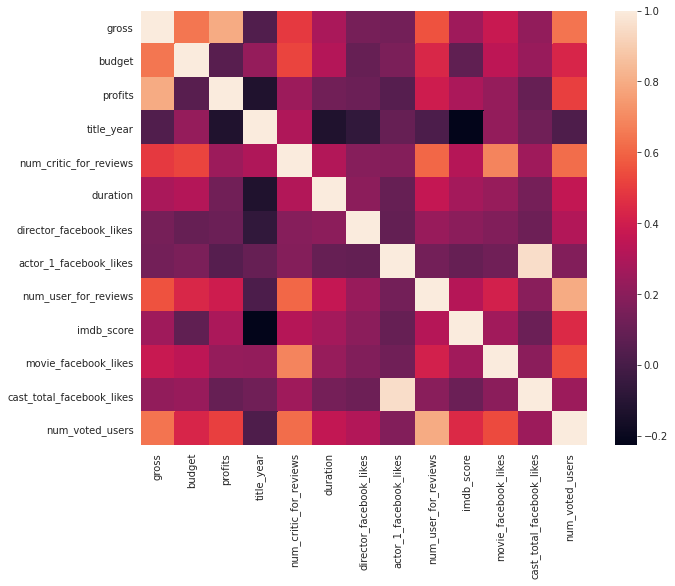

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(imdb_usa_prof_corr)

In [ ]:
imdb_usa_prof_2000_corr = imdb_usa_prof_2000[["gross", "budget", "profits",
"title_year","num_critic_for_reviews","duration","director_facebook_likes",
"actor_1_facebook_likes","num_user_for_reviews","imdb_score",
"movie_facebook_likes","cast_total_facebook_likes","num_voted_users"]].corr()
imdb_usa_prof_2000_corr

,gross,budget,profits,title_year,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,num_user_for_reviews,imdb_score,movie_facebook_likes,cast_total_facebook_likes,num_voted_users
gross,1.000000,0.709233,0.770642,0.105342,0.543990,0.342411,0.155605,0.128493,0.594946,0.249020,0.407597,0.226552,0.691786
budget,0.709233,1.000000,0.097307,0.058550,0.535600,0.418115,0.151265,0.141779,0.489918,0.175561,0.352466,0.224866,0.528964
profits,0.770642,0.097307,1.000000,0.035039,0.305758,0.125508,0.087696,0.043196,0.412222,0.243532,0.265238,0.106839,0.514080
title_year,0.105342,0.058550,0.035039,1.000000,0.258795,0.006476,-0.013320,0.033378,-0.151418,-0.012229,0.366567,0.056705,0.009200
num_critic_for_reviews,0.543990,0.535600,0.305758,0.258795,1.000000,0.459286,0.263238,0.162369,0.629136,0.446241,0.696993,0.245616,0.718582
duration,0.342411,0.418115,0.125508,0.006476,0.459286,1.000000,0.245300,0.101796,0.476120,0.349153,0.347535,0.157103,0.465685
director_facebook_likes,0.155605,0.151265,0.087696,-0.013320,0.263238,0.245300,1.000000,0.080830,0.297154,0.187717,0.218673,0.124873,0.366642
actor_1_facebook_likes,0.128493,0.141779,0.043196,0.033378,0.162369,0.101796,0.080830,1.000000,0.119387,0.119555,0.109979,0.953666,0.173528
num_user_for_reviews,0.594946,0.489918,0.412222,-0.151418,0.629136,0.476120,0.297154,0.119387,1.000000,0.332480,0.403925,0.189358,0.799296
imdb_score,0.249020,0.175561,0.243532,-0.012229,0.446241,0.349153,0.187717,0.119555,0.332480,1.000000,0.309627,0.140903,0.462125


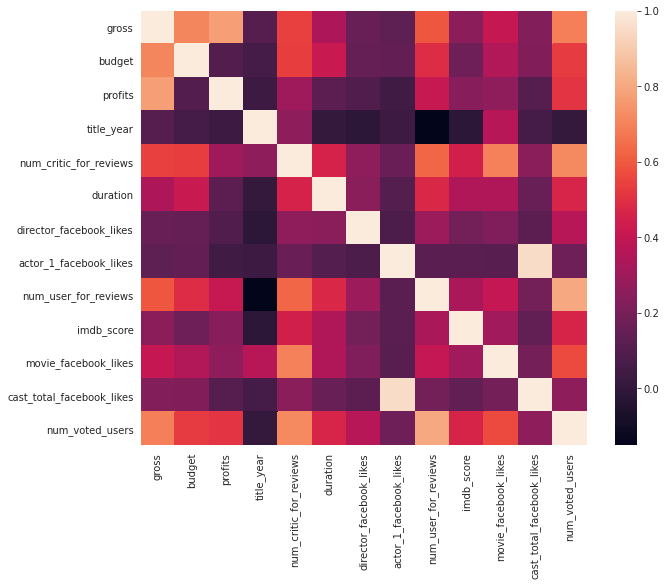

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(imdb_usa_prof_2000_corr)

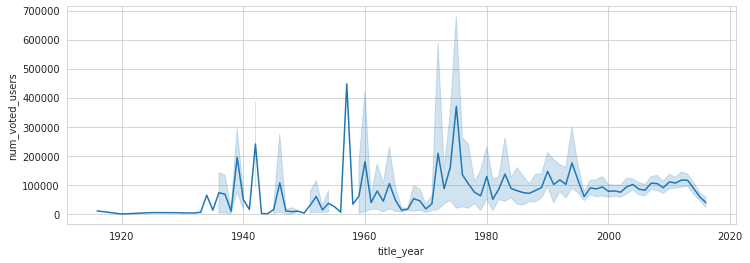

In [ ]:
plt.figure(figsize=(12,4))
plot_imdb = imdb_usa[["movie_title","title_year","num_voted_users"]].dropna()
sns.lineplot(data=plot_imdb, x="title_year", y="num_voted_users")
#plot_imdb.sort_values('num_voted_users')

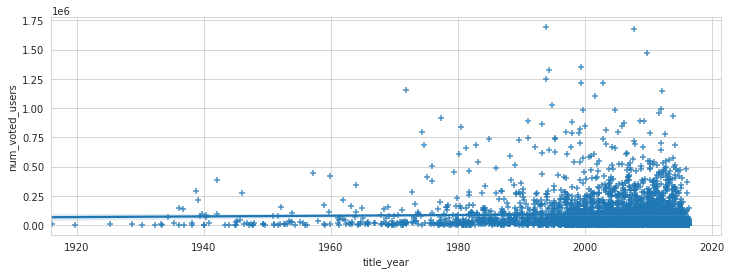

In [ ]:
plt.figure(figsize=(12,4))
sns.regplot(data=plot_imdb, x="title_year", y="num_voted_users", x_jitter=.4, marker="+")